[ Info: Saved animation to /Users/aidanjanney/VS Code/Misc./Chaos_Fractals/tmp.gif


Plots.AnimatedGif("/Users/aidanjanney/VS Code/Misc./Chaos_Fractals/tmp.gif")
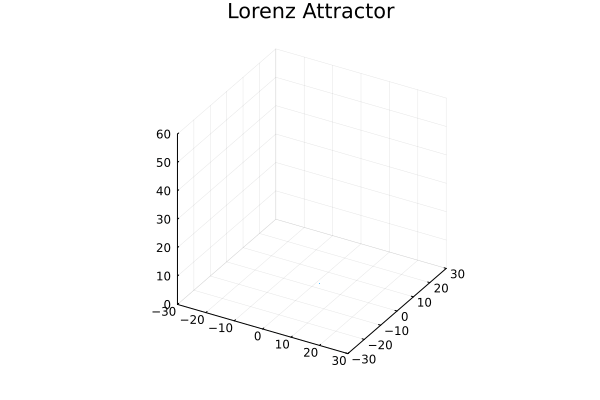

In [ ]:
using Plots
# define the Lorenz attractor
@kwdef mutable struct Lorenz
    dt::Float64 = 0.005
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 2
    y::Float64 = 1
    z::Float64 = 1
end



function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()

# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 0,
    legend=false,
)


# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:15000
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 50


savefig(plt, "attractor.png")

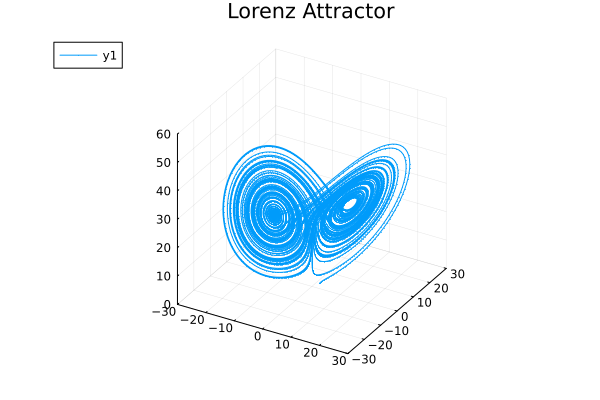

"/Users/aidanjanney/VS Code/Misc./Chaos_Fractals/test.png"

In [ ]:
display(plt)


In [3]:
using DynamicalSystems
Systems.lorenz()

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  lorenz_rule
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [10.0, 28.0, 2.6666666666666665]
 time:          0.0
 state:         [0.0, 10.0, 0.0]


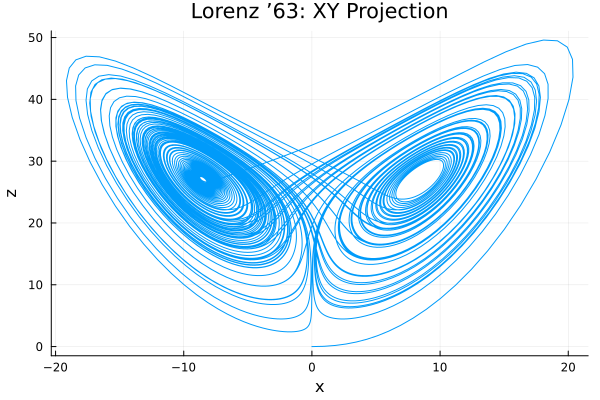

In [7]:
using DifferentialEquations, Plots

# 1) Define the Lorenz ’63 right‐hand side (same as your original code)
function lorenz!(du,u,p,t)
    σ, ρ, β = p
    du[1] = σ*(u[2] - u[1])
    du[2] = u[1]*(ρ - u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

# 2) Set parameters, initial condition, and timespan
p     = (10.0, 28.0, 8/3)   # σ, ρ, β
u0    = [0.0, 10.0, 0.0]     # initial (x,y,z)
tspan = (0.0, 100.0)        # integrate from t=0 to t=100

# 3) Build and solve the ODEProblem, saving at a fixed Δt
prob = ODEProblem(lorenz!, u0, tspan, p)
sol  = solve(prob, Tsit5(); saveat=0.01)   # Tsit5() is a good default

# 4) Extract x and y series
xs = getindex.(sol.u, 1)
ys = getindex.(sol.u, 2)
zs = getindex.(sol.u, 3)

# 5) Static xy‐plane plot
p = plot(xs, zs;
     xlabel    = "x",
     ylabel    = "z",
     title     = "Lorenz ’63: XY Projection",
     linewidth = 1,
     legend    = false)


In [8]:
savefig(p, "lorenz_xz.png")

"/Users/aidanjanney/VS Code/Misc./Chaos_Fractals/lorenz_xz.png"

In [98]:
using Makie
using GLMakie
using GeometryBasics
using LinearAlgebra

@kwdef mutable struct Lorenz
    dt::Float64 = 0.0001
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 0
    y::Float64 = 10
    z::Float64 = 0
    trajectory::Vector{Point3f} = Point3f[(x,y,z)]
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
    push!(l.trajectory, Point3f(l.x,l.y,l.z))
end

attractor = Lorenz()

fig = Figure(size=(800,600))
ax = Axis3(fig[1,1], title = "Lorenz Attractor", xlabel="X", ylabel="Y", zlabel="Z",azimuth=1.75*pi)
limits!(ax, -30, 40, -30, 40, 0, 60)

traj_obs = Observable(attractor.trajectory)

lineplot = lines!(ax, traj_obs, color=:gray, linewidth=0.5)

function update!()
    step!(attractor)
    traj_obs[] = attractor.trajectory
end

for i in 1:1000000
    update!()
end

"""
record(fig, "lorenz.mp4", 1:3000, framerate=60) do i
    update!(i)
end
"""

"record(fig, \"lorenz.mp4\", 1:3000, framerate=60) do i\n    update!(i)\nend\n"

In [92]:
scatter!(ax, traj_obs[][1:10:end],markersize=0.5,color=:gray)

Scatter{Tuple{Vector{Point{3, Float32}}}}

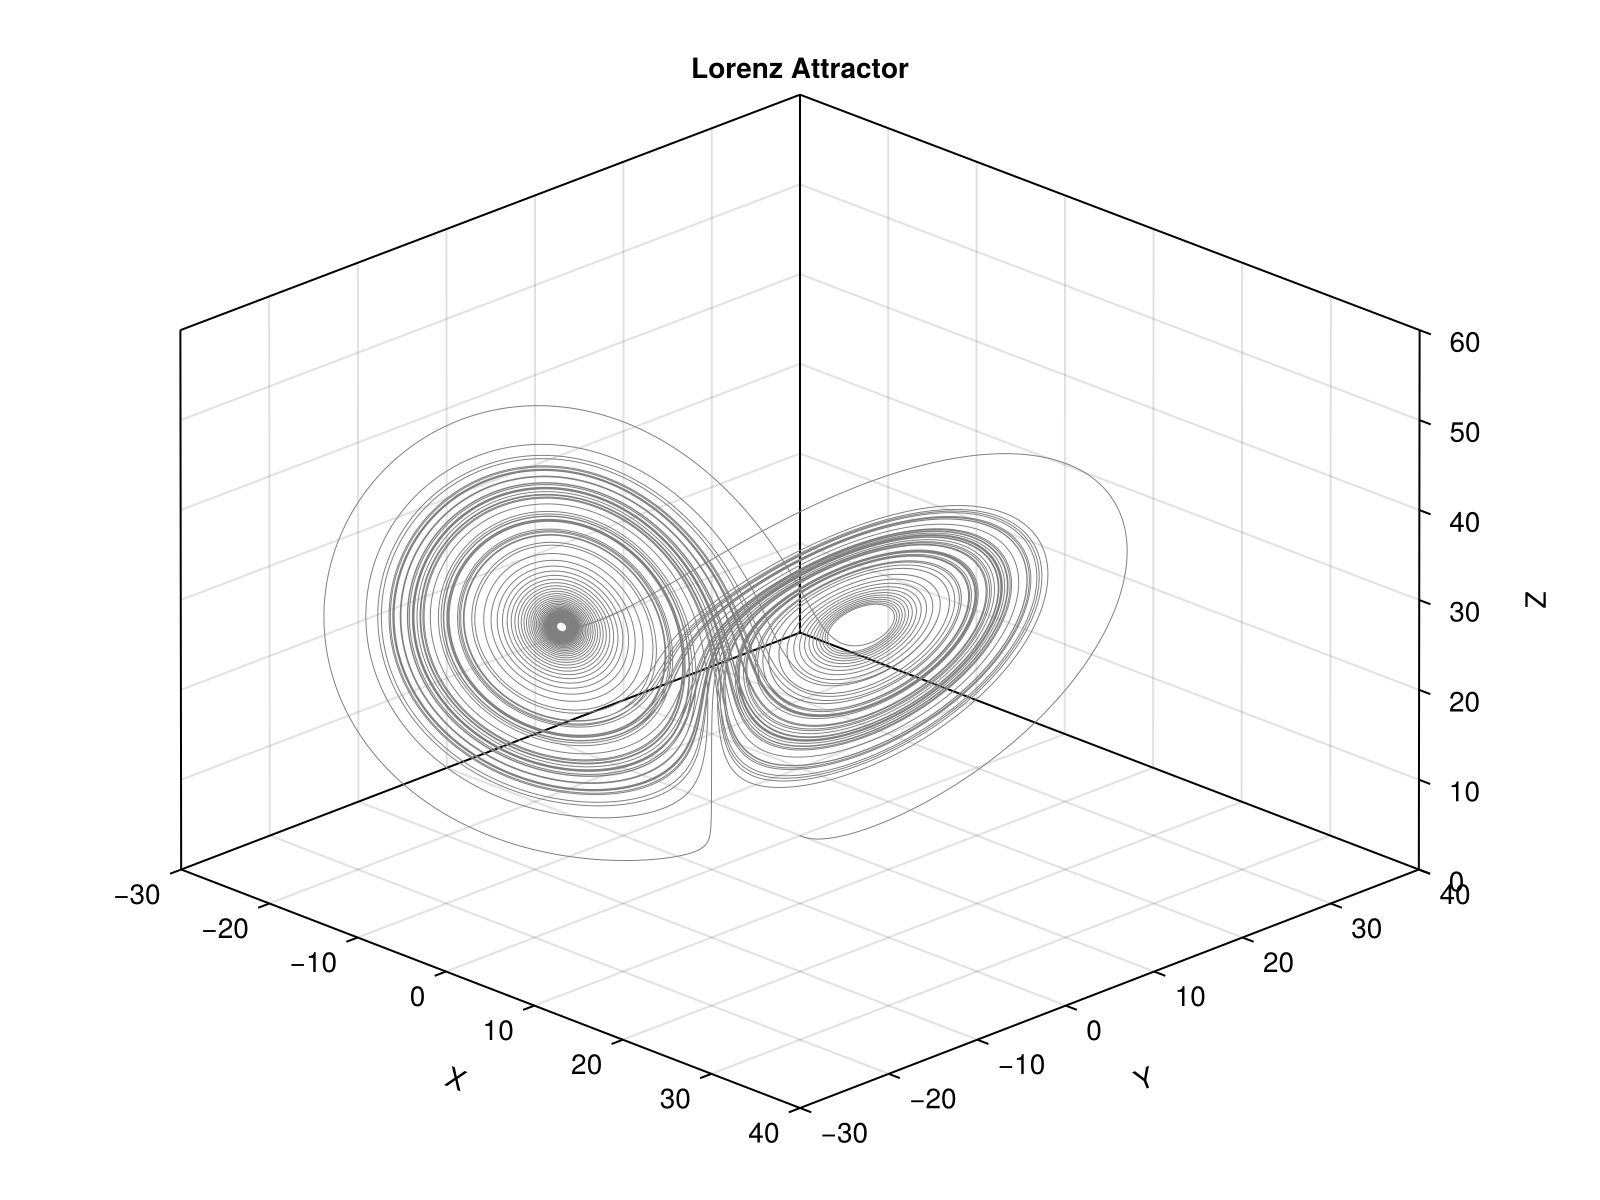

In [99]:
fig

In [4]:
using DynamicalSystems
using PredefinedDynamicalSystems
using Makie
using GLMakie
using CairoMakie

CairoMakie.activate!()
#GLMakie.activate!()
#Makie.inline!(false)  # Probably unnecessary?
lorenz = PredefinedDynamicalSystems.lorenz([0.0,1.0,2.0])

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  lorenz_rule
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [10.0, 28.0, 2.6666666666666665]
 time:          0.0
 state:         [0.0, 1.0, 2.0]


In [5]:
step!(lorenz,500)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  lorenz_rule
 ODE solver:    Tsit5
 ODE kwargs:    (abstol = 1.0e-6, reltol = 1.0e-6)
 parameters:    [10.0, 28.0, 2.6666666666666665]
 time:          500.0221694079854
 state:         [11.232894269436303, 16.06536993133552, 23.971901954887652]


In [6]:
lines!(lorenz)

LoadError: There is no current figure to plot into.

In [1]:
using Plots, Interact, Base.Threads, BenchmarkTools

# only called by resize.
function batchify(maxIndex, numBatches)
    if mod(maxIndex, numBatches) == 0
        n = numBatches
    else
        n = numBatches - 1
    end
    batchSize = div(maxIndex, n)
    lastBatch = batchSize*n+1:maxIndex
    batches = [(i-1)*batchSize+1:i*batchSize for i in 1:n]
    if length(lastBatch) > 0
        push!(batches, lastBatch)
    end
    batches
end

numThreads = Threads.nthreads() - 1

# scale should change with picture size
scale = 350.0 # the greater the more details
shift = 0.0+0.0im

function resize(w, h)
    global width  = w
    global height = h
    # Complex number grid, to compute Julia(., c) for.
    # axis have odd numbers by construction. good?
#    global xAxis = [1.0y/scale for y in -div(width,  2):1:div(width,  2)]
#    global yAxis = [1.0x/scale for x in -div(height, 2):1:div(height, 2)]
#    global valueGrid = [x+y*im for y in yAxis, x in xAxis]
#    # Here we will put our function values.
#    global dataGrid = [UInt8(0) for x = 1:height, y = 1:width]
#    global batches = batchify(height, numThreads)
    :ok
end

# start values for picture size
resize(800, 700)

const MAXITER = UInt32(255)

function julia(z0, c, maxiter) :: UInt32
    z = z0
    for i = UInt32(1):maxiter
        z = z*z + c
        if abs2(z) >= 4.0
            return i
        end
    end
    return UInt32(0)
end

# I'm not happy with the parallelization yet
function juliaSet(batches, valueGrid, dataGrid, c)
    @threads for batch in batches
        for x in batch
            for y = 1:width
                @inbounds dataGrid[x,y] = julia(valueGrid[x,y], c, MAXITER)
            end
        end
    end
end

# juliaP and juliaSetP by Simon Danisch. May contain errors added by zenon ...
function juliaP(z0, c, maxiter)
    z = z0
    for i in 1:maxiter
        abs2(z) > 4f0 && return (i - 1) % UInt32
        z = z * z + c
    end
    return 0 % UInt32 # % is used to convert without overflow check
end

function juliaSetP(valueGrid, dataGrid, c)
    Threads.@threads for i in eachindex(dataGrid)
        @inbounds dataGrid[i] = juliaP(valueGrid[i], c, MAXITER)
    end
    return dataGrid
end

function j(c)
    xAxis = [1.0y/scale for y in -div(width,  2):1:div(width,  2)][1:end-1]
    yAxis = [1.0x/scale for x in -div(height, 2):1:div(height, 2)][1:end-1]
    valueGrid = [x+y*im for y in yAxis, x in xAxis]
    # Here we will put our function values.
    dataGrid = [UInt8(0) for x = 1:height, y = 1:width]
    batches = batchify(height, numThreads)
    println("value : $(size(valueGrid))")
    println("data : $(size(dataGrid))")
    println("simon:")
    @btime juliaSetP($valueGrid, $dataGrid, $c)
    println("zenon:")
    @btime juliaSet($batches, $valueGrid, $dataGrid, $c)
    # color = :ice ?
    #heatmap(xAxis, yAxis, dataGrid, size=(width,height), nbins=256, aspect_ratio=1, title="c = $c")
    :ok
end

j() = j(-0.62+0.42im)
# -0.62+0.42im
# 0.39+0.6im
# 0.0+0.64im
# 0.0+0.75im
# -0.512511498387847167+ 0.521295573094847167im https://en.wikipedia.org/wiki/File:Julia_set,_plotted_with_Matplotlib.svg

function p()
    xAxis = [1.0y/scale for y in -div(width,  2):1:div(width,  2)][1:end-1]
    yAxis = [1.0x/scale for x in -div(height, 2):1:div(height, 2)][1:end-1]
    valueGrid = [x+y*im for y in yAxis, x in xAxis]
    # Here we will put our function values.
    dataGrid = [UInt8(0) for x = 1:height, y = 1:width]
    batches = batchify(height, numThreads)
    @manipulate throttle = 0.1 for x in -1.0:0.01:1.0, y in -1.0:0.01:1.0
        c = x+y*im
        # @time juliaSet(batches, valueGrid, dataGrid, c)
        @time juliaSetP(valueGrid, dataGrid, c)
        heatmap(xAxis, yAxis, dataGrid, size=(width,height), nbins=256, aspect_ratio=1, title="c = $c")
    end
end

display(p())
display(j())

WebIO._IJuliaInit()

LoadError: DivideError: integer division error